# Data Pre-Processing

#### Import Packages and CSV

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# machine learning models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
import math
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

# preprocessing functions and evaluation models
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier

%matplotlib inline
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

**Import the CSV Data as Pandas DataFrame**

In [15]:
df = pd.read_csv('covtype.csv')
df.head()

,Unnamed: 0,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0,1,2596,51,3,258,0,510,221,232,...,0,0,0,0,0,0,0,0,0,5
1,1,2,2590,56,2,212,-6,390,220,235,...,0,0,0,0,0,0,0,0,0,5
2,2,3,2804,139,9,268,65,3180,234,238,...,0,0,0,0,0,0,0,0,0,2
3,3,4,2785,155,18,242,118,3090,238,238,...,0,0,0,0,0,0,0,0,0,2
4,4,5,2595,45,2,153,-1,391,220,234,...,0,0,0,0,0,0,0,0,0,5


## Data Cleaning
#### Checking features with nan value

In [16]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

**Handling Duplicates**

In [17]:
df.duplicated().sum()

0

# Feature Engineering
### Type of Features
**Numeric Features**

In [18]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Number of Numerical Features :', len(numeric_features))

Number of Numerical Features : 57


**Categorical Features**

In [19]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Number of Categorical Features :', len(categorical_features))

Number of Categorical Features : 0


**Discrete Features**

In [20]:
discrete_features=[feature for feature in numeric_features if (len(df[feature].unique())<=25)]
print('Number of Discrete Features :',len(discrete_features))

Number of Discrete Features : 45


**Continuous features**

In [21]:
continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]
print('Number of Continuous Features :',len(continuous_features))

Number of Continuous Features : 12


### Check Outlier and Capping it
**Why outliers?**
* Data Entry error : Human error. 
* Measurement error: Instrument error. 
* Natural error: it will be Real life data.
* Intentional error: People give wrong inputs

**Impact of Outliers ?**
* Ouliers can very high impact on few Machine learning models.
* Can Cause bias in the output.

**Checking Outliers in Continuous features**

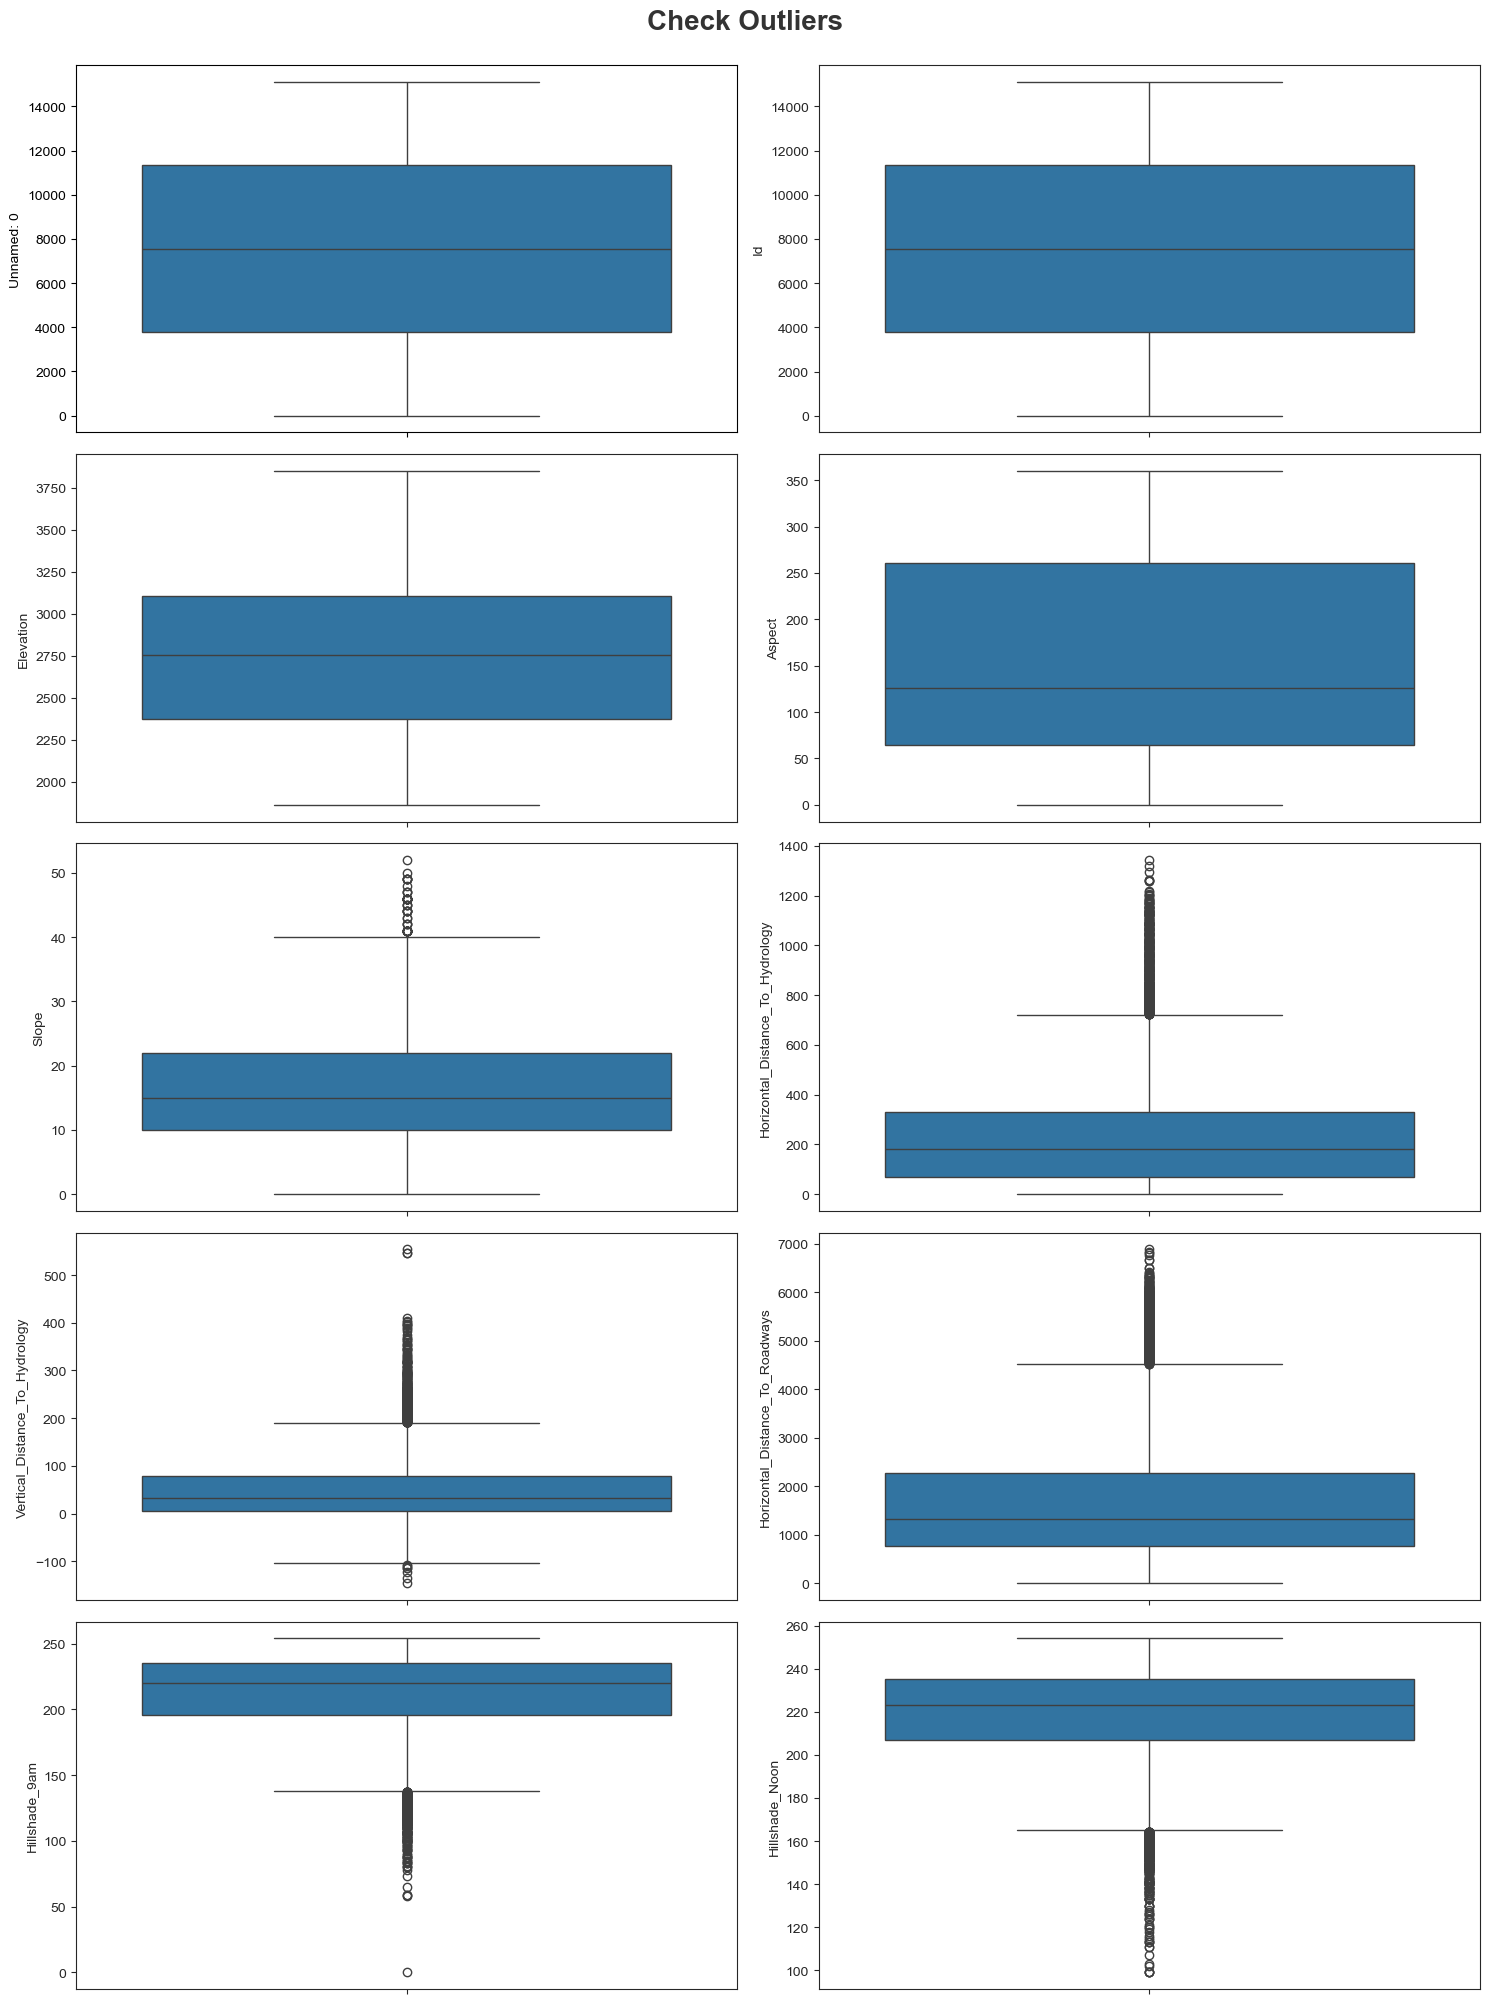

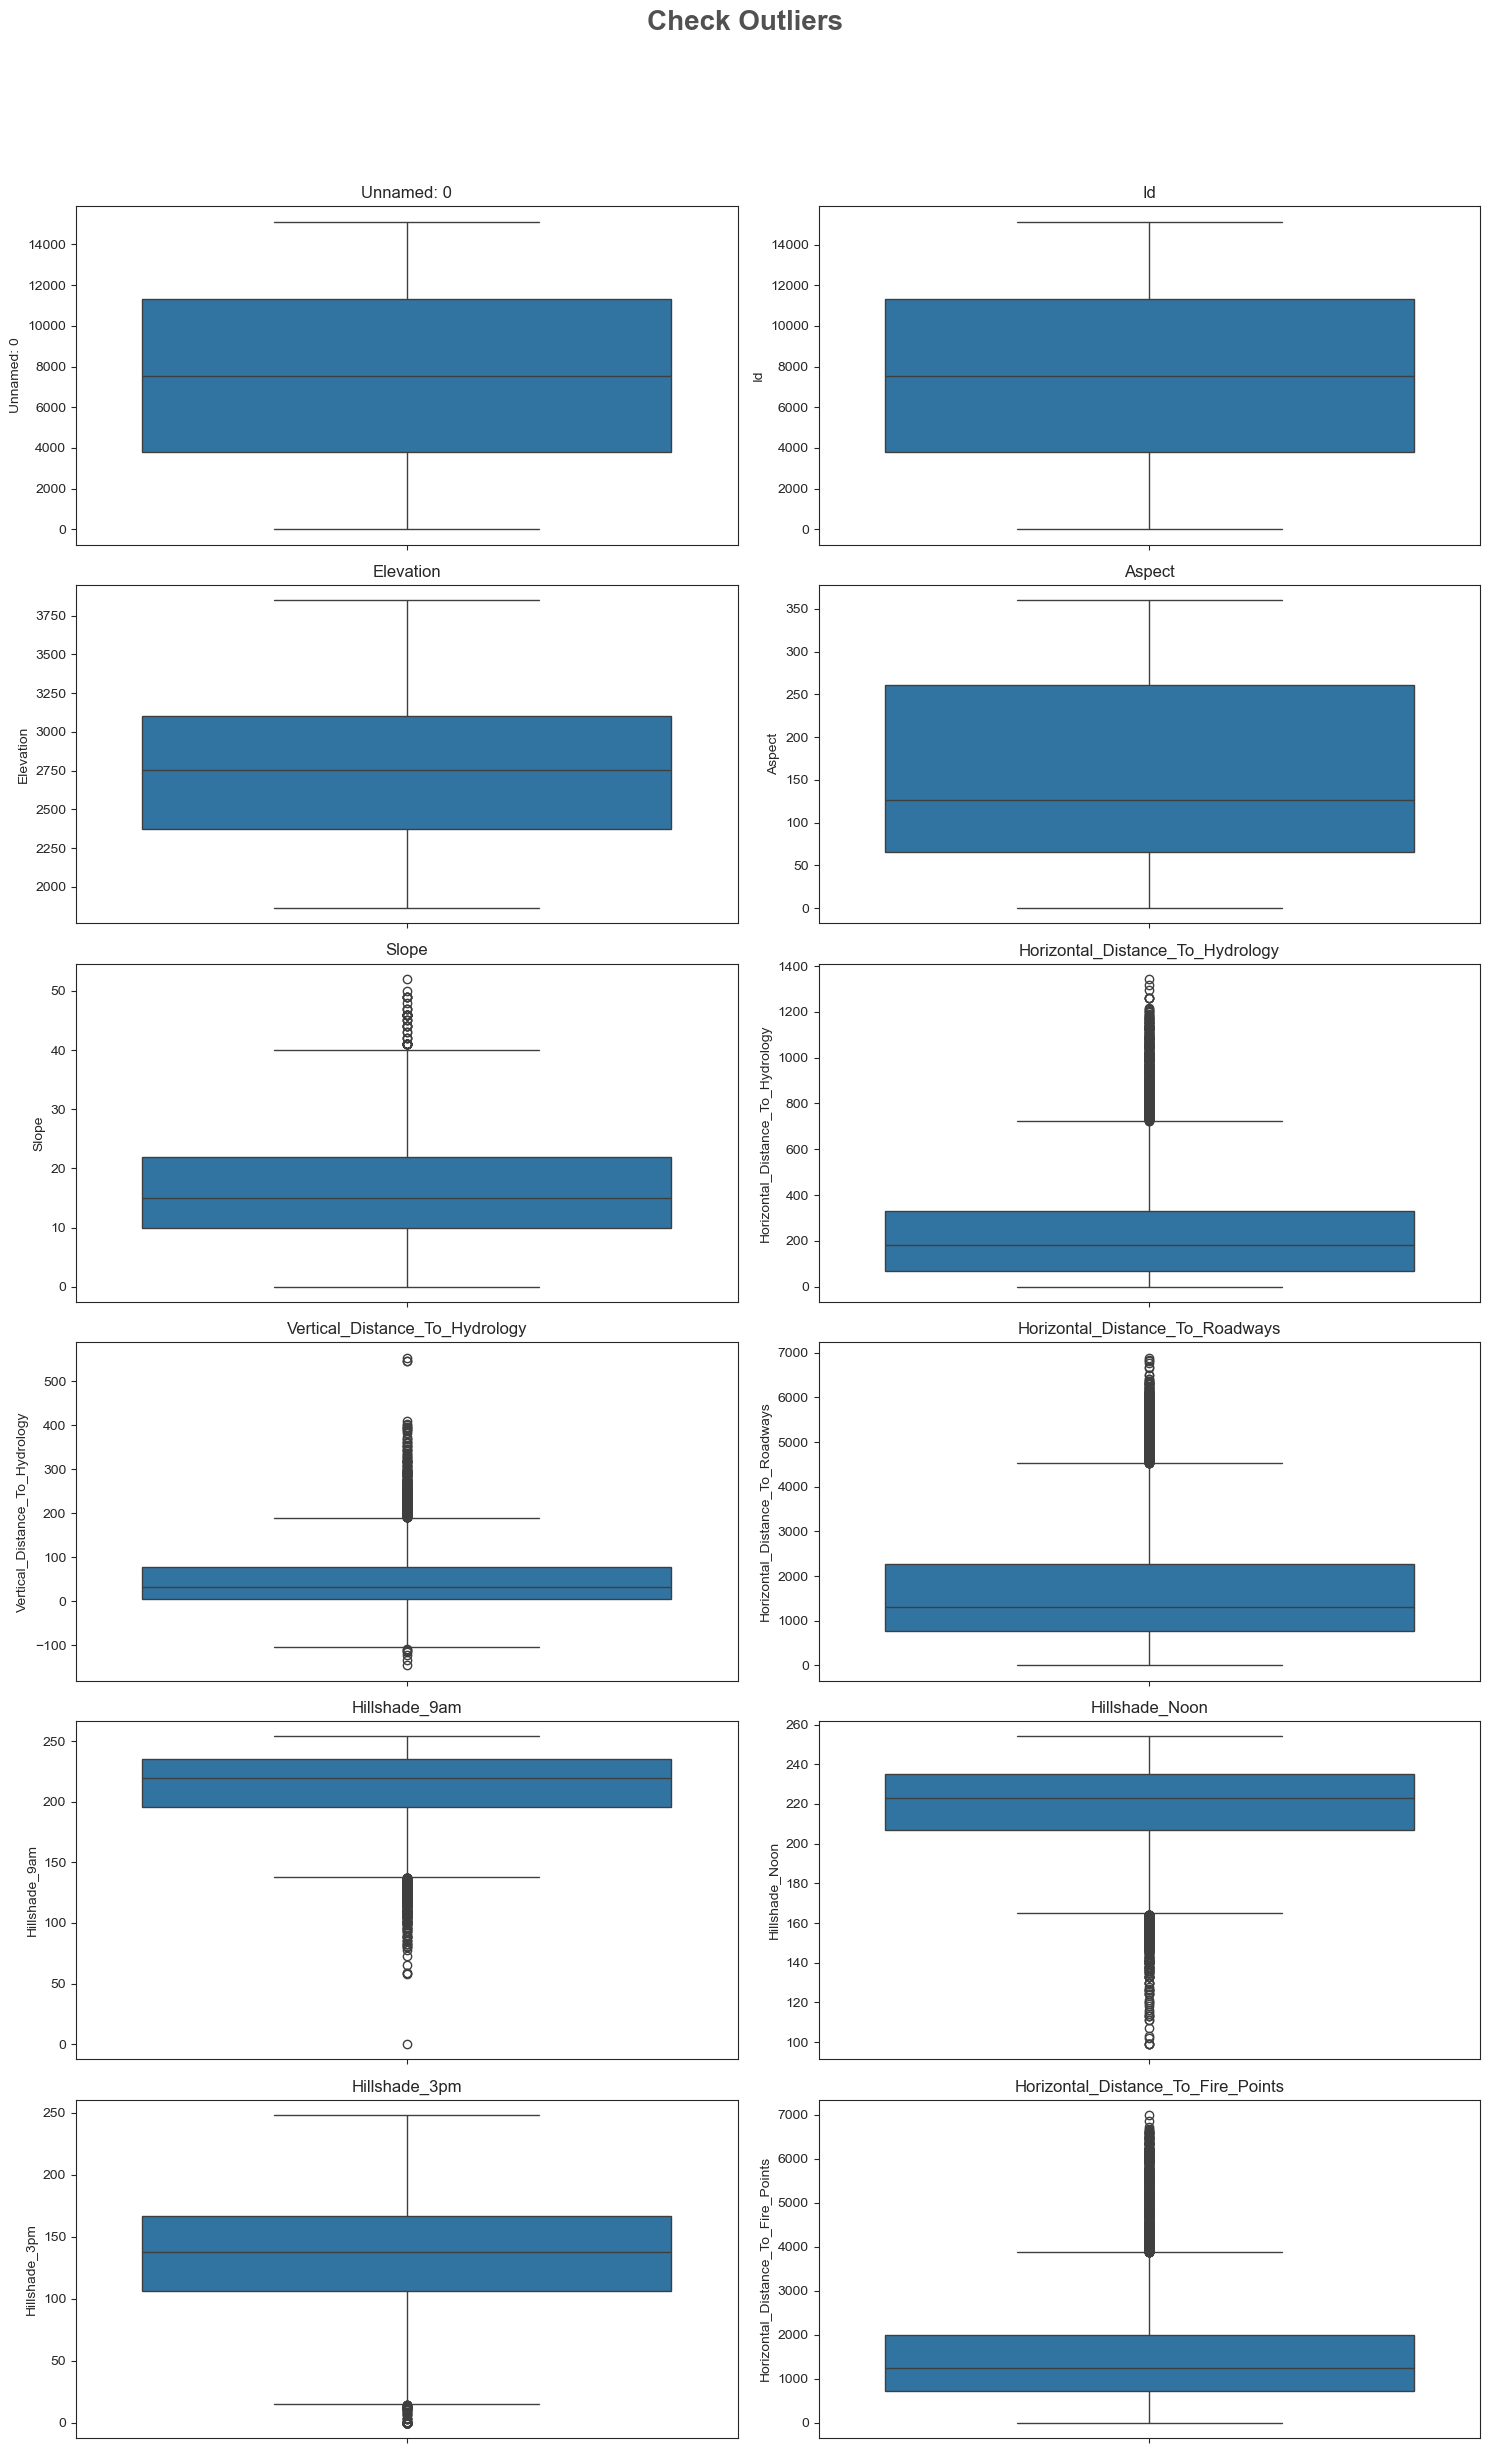

In [22]:
cols = 2
rows = math.ceil(len(continuous_features) / cols)

plt.figure(figsize=(15, rows * 4))
plt.suptitle('Check Outliers', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

for i in range(len(continuous_features)):
    plt.subplot(rows, cols, i + 1)
    sns.set_style('ticks')
    sns.boxplot(y=df[continuous_features[i]])
    plt.title(continuous_features[i])

plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to fit suptitle
plt.show()

#### Insight
- Except 'Aspect' rest all other 9 continuous features has outliers.

In [23]:
df_copy = df.copy()
def detect_and_capping_outliers(col):
    # Finding the IQR
    percentile25 = df_copy[col].quantile(0.25)
    percentile75 = df_copy[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    df_copy.loc[(df[col]>upper_limit), col]= upper_limit
    df_copy.loc[(df[col]<lower_limit), col]= lower_limit    
    return df_copy

In [24]:
for col in continuous_features:
         detect_and_capping_outliers(col)

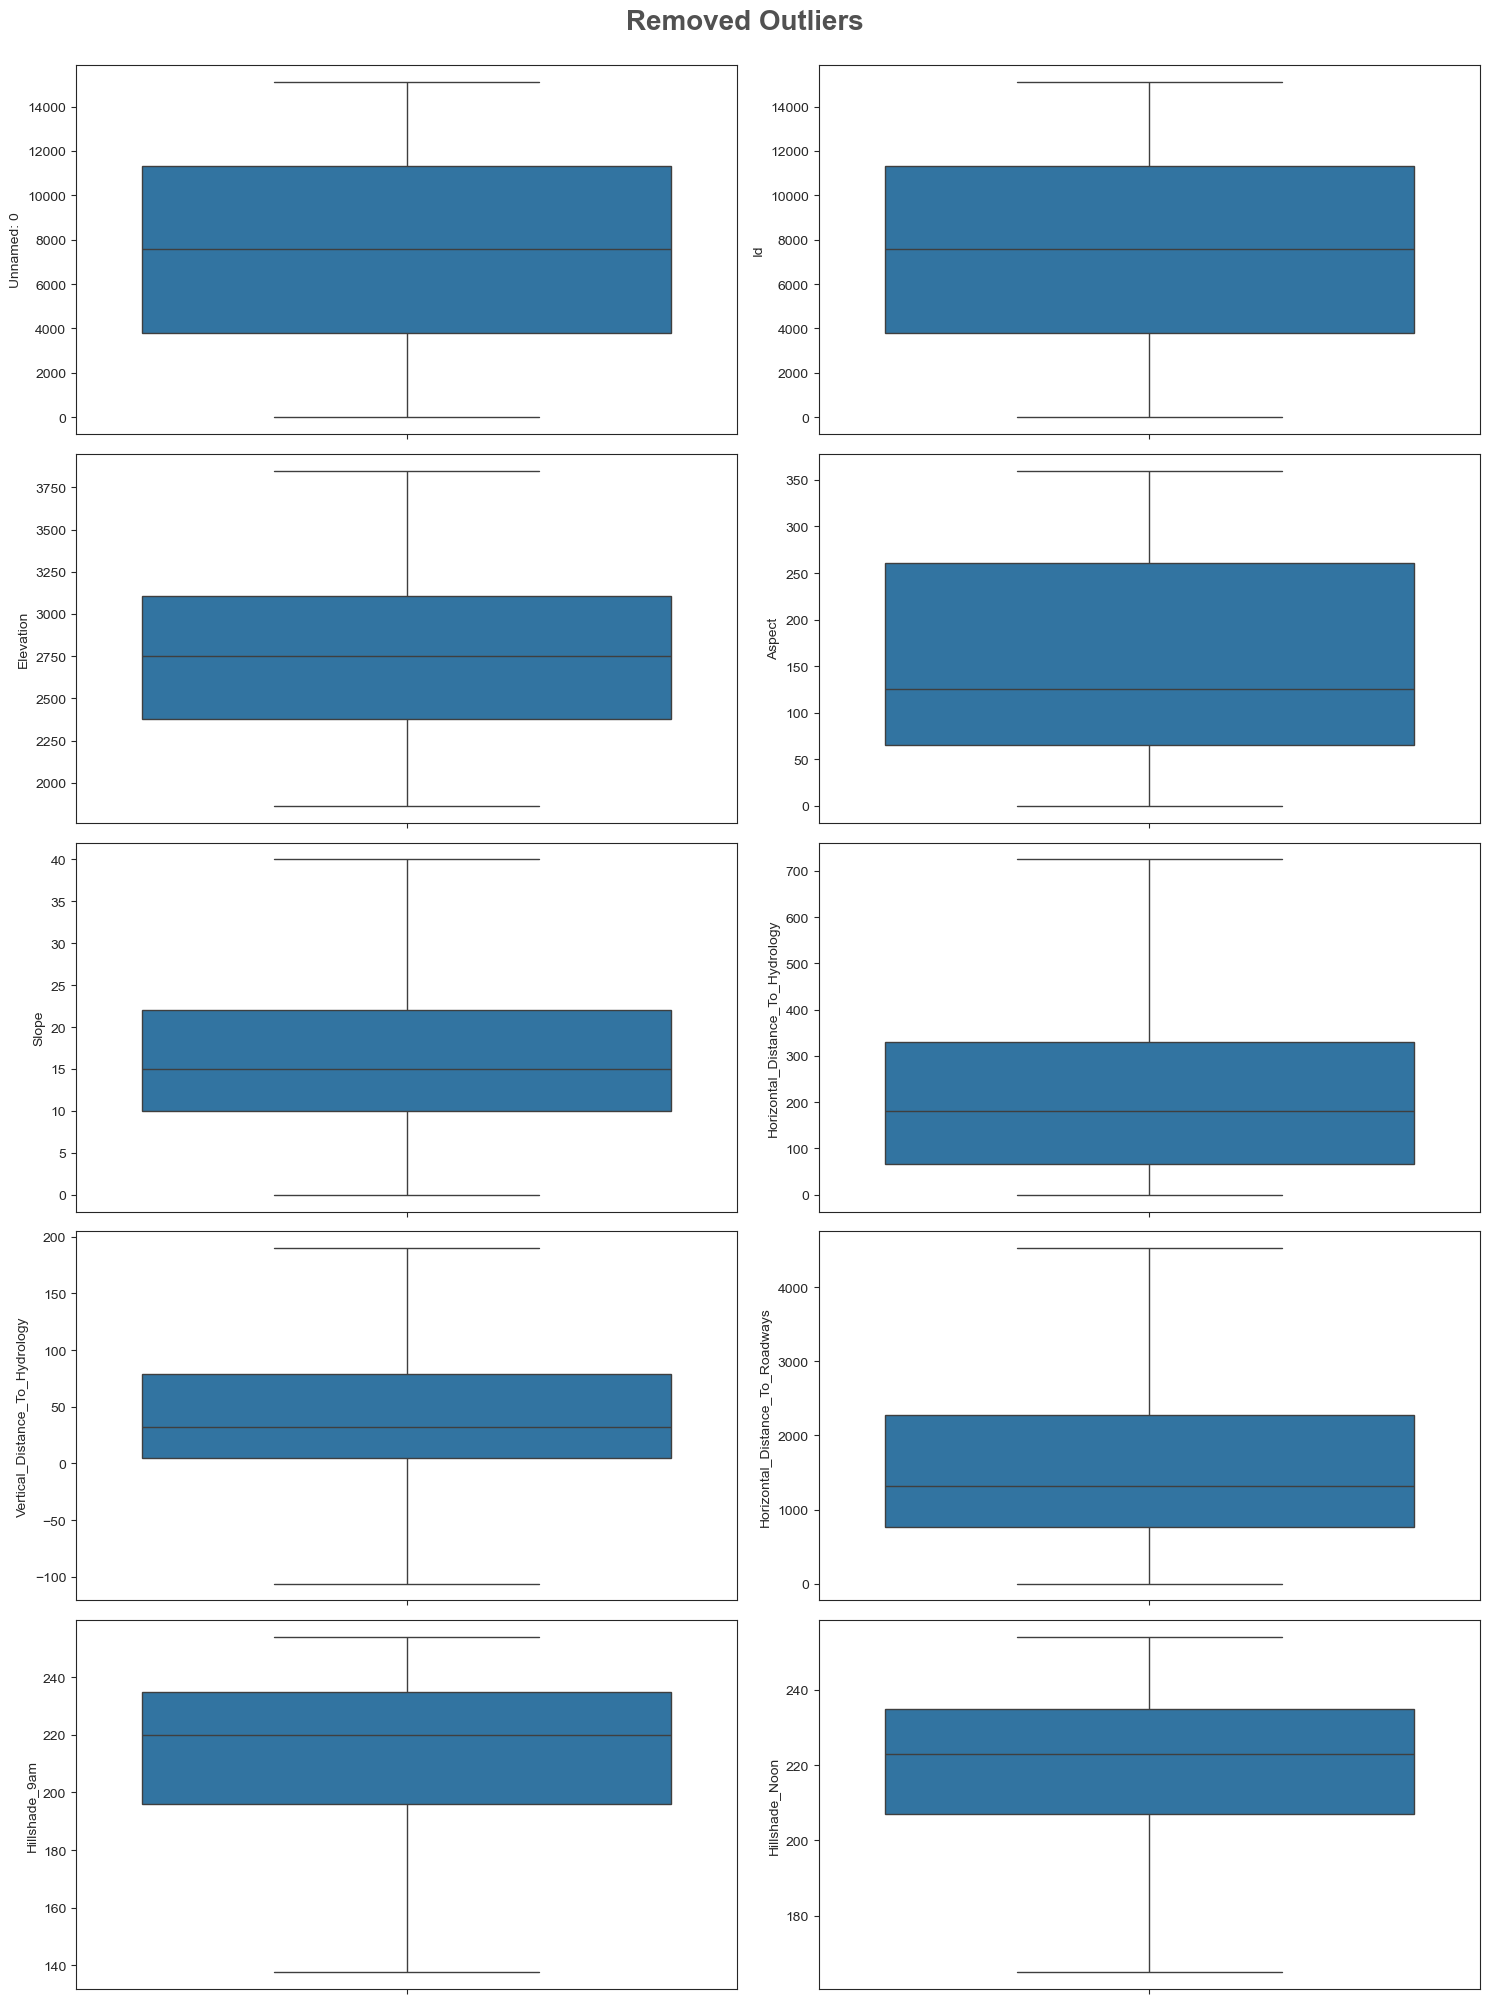

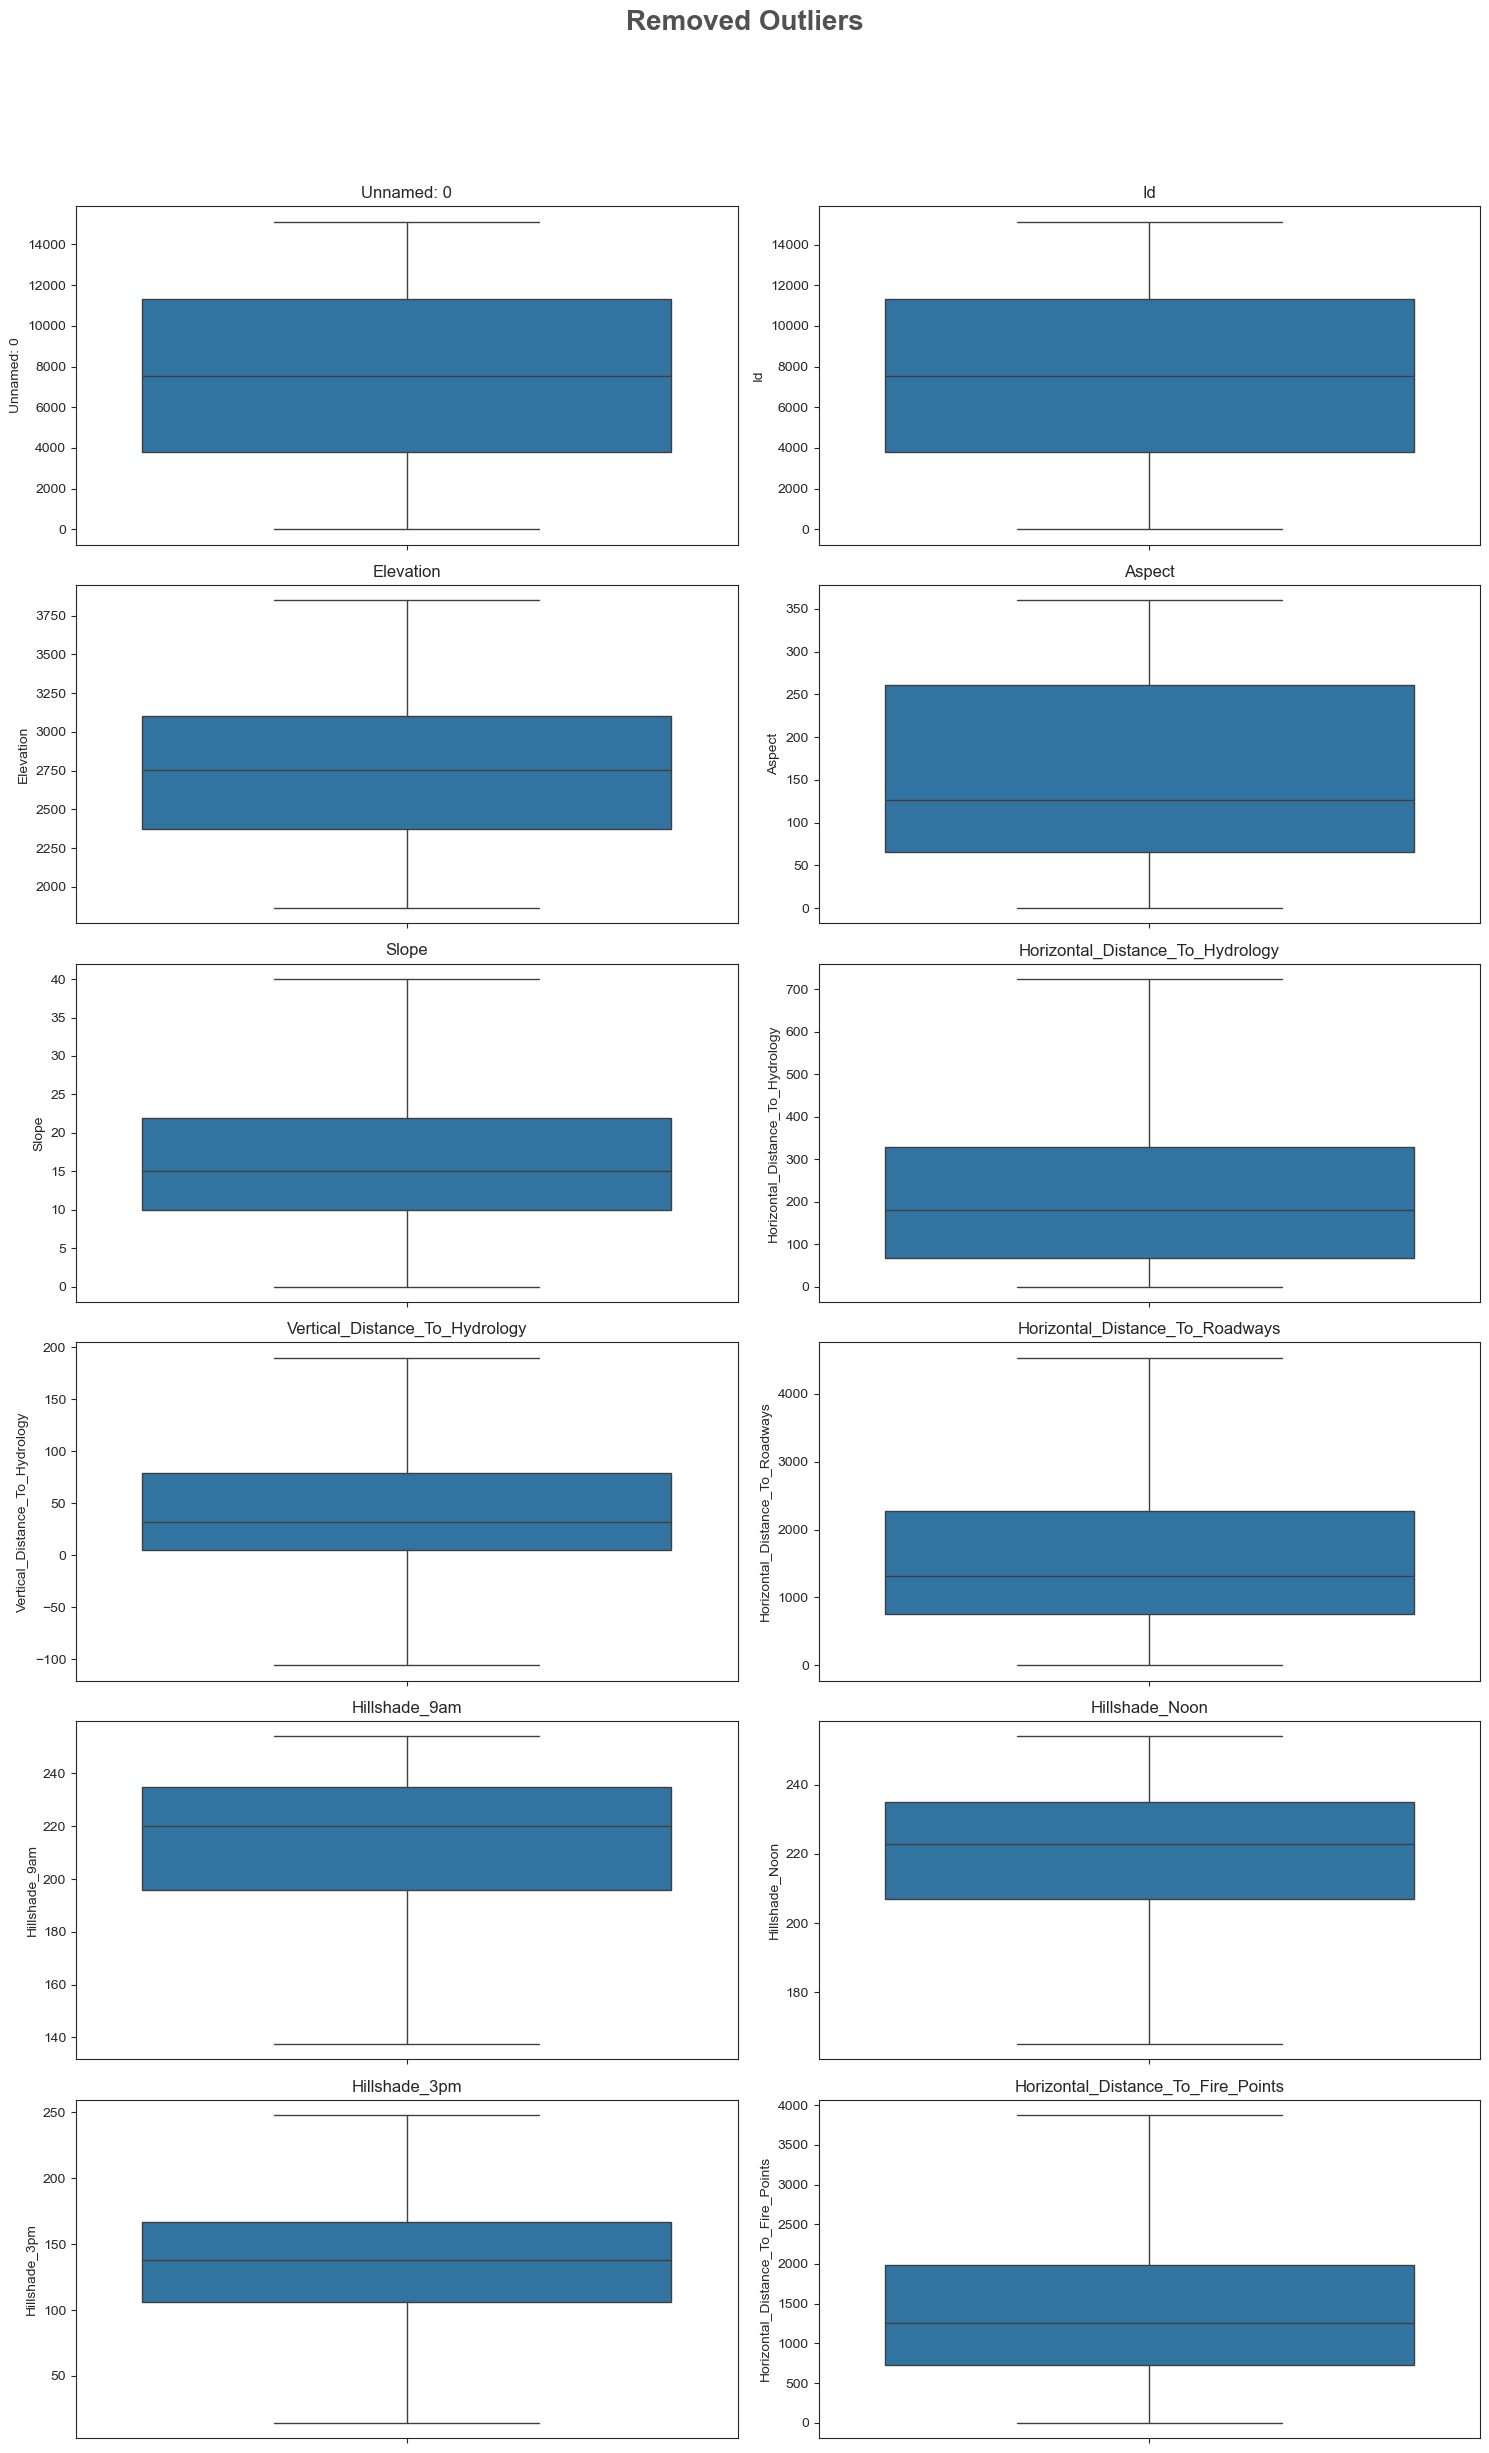

In [26]:
cols = 2
rows = math.ceil(len(continuous_features) / cols)

plt.figure(figsize=(15, rows * 4))
plt.suptitle('Removed Outliers', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

for i in range(len(continuous_features)):
    plt.subplot(rows, cols, i + 1)
    sns.set_style('ticks')
    sns.boxplot(y=df_copy[continuous_features[i]])
    plt.title(continuous_features[i])

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [27]:
df.columns

Index(['Unnamed: 0', 'Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_T

#### Create one column as Wilderness_Area_Type and represent it as categorical data

In [28]:
df['Wilderness_Area_Type'] = (df.iloc[:, 10:15] == 1).idxmax(1)
#list of wilderness areas
wilderness_areas = sorted(df['Wilderness_Area_Type'].value_counts().index.tolist())

In [29]:
wilderness_areas

['Hillshade_3pm', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3']

In [30]:
def split_numbers_chars(row):
    '''This function fetches the numerical characters at the end of a string
    and returns alphabetical character and numerical charcters respectively'''
    head = row.rstrip('0123456789')
    tail = row[len(head):]
    return head, tail

def reverse_one_hot_encode(dataframe, start_loc, end_loc, numeric_column_name):
    ''' this function takes the start and end location of the one-hot-encoded column set and numeric column name to be created as arguments
    1) transforms one-hot-encoded columns into one column consisting of column names with string data type
    2) splits string column into the alphabetical and numerical characters
    3) fetches numerical character and creates numeric column in the given dataframe
    '''
    dataframe['String_Column'] = (dataframe.iloc[:, start_loc:end_loc] == 1).idxmax(1)
    dataframe['Tuple_Column'] = dataframe['String_Column'].apply(split_numbers_chars)
    dataframe[numeric_column_name] = dataframe['Tuple_Column'].apply(lambda x: x[1]).astype('int64')
    dataframe.drop(columns=['String_Column','Tuple_Column'], inplace=True)

In [31]:
df_copy = df.copy()
reverse_one_hot_encode(df_copy, 14, 56, "Soil_Type")

In [32]:
feature_names = continuous_features + wilderness_areas + ["Soil_Type"] + ["Cover_Type"]
all_features_df = df_copy[feature_names]
all_features_df

,Unnamed: 0,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Hillshade_3pm,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Soil_Type,Cover_Type
0,0,1,2596,51,3,258,0,510,221,232,148,6279,148,1,0,0,29,5
1,1,2,2590,56,2,212,-6,390,220,235,151,6225,151,1,0,0,29,5
2,2,3,2804,139,9,268,65,3180,234,238,135,6121,135,1,0,0,12,2
3,3,4,2785,155,18,242,118,3090,238,238,122,6211,122,1,0,0,30,2
4,4,5,2595,45,2,153,-1,391,220,234,150,6172,150,1,0,0,29,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15115,15116,2607,243,23,258,7,660,170,251,214,1282,214,0,0,1,3,3
15116,15116,15117,2603,121,19,633,195,618,249,221,91,1325,91,0,0,1,3,3
15117,15117,15118,2492,134,25,365,117,335,250,220,83,1187,83,0,0,1,3,3
15118,15118,15119,2487,167,28,218,101,242,229,237,119,932,119,0,0,1,3,3


## Handling Imbalanced Target Variable(Cover_Type)

In [33]:
all_features_df["Cover_Type"] = all_features_df["Cover_Type"]-1

In [34]:
all_features_df["Cover_Type"].value_counts()

Cover_Type
4    2160
1    2160
0    2160
6    2160
2    2160
5    2160
3    2160
Name: count, dtype: int64

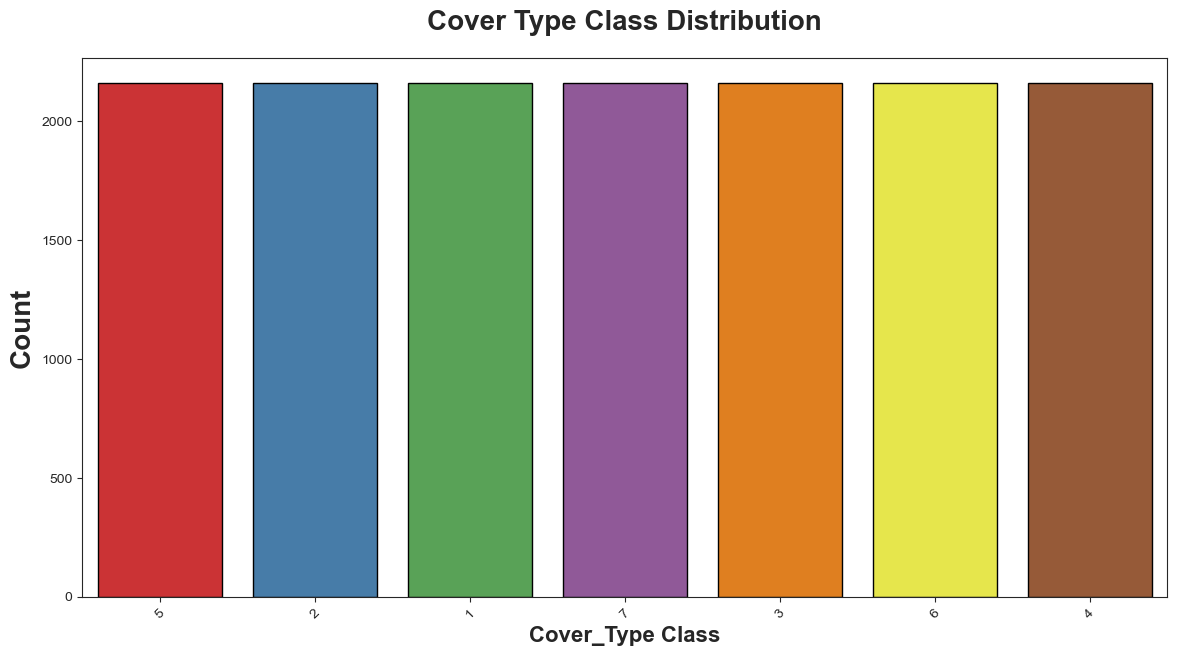

In [35]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Cover_Type", data=df,ec = "black",palette="Set1",order = df['Cover_Type'].value_counts().index)
plt.title("Cover Type Class Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Cover_Type Class", weight="bold", fontsize=16)
plt.xticks(rotation= 45)

plt.show()

#### Inference
- As most of the data is of class 0 and class 1 type.
- So its a clear case of imbalaced data 

In [36]:
def split_and_scale_data(df):
    df = df.copy()
    
    # Split data in train and test set
    X = df.drop("Cover_Type", axis = 1)
    y = df["Cover_Type"]
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    # Scale data using standard scaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [37]:
def evaluate_model(model, blanced_class, X_test, y_test):
    model_accuracy = model.score(X_test, y_test)
    print("Accuracy({}):{:.2f}%".format(blanced_class, model_accuracy*100))

    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    cl_report = classification_report(y_test, y_pred)
    
    plt.figure(figsize=(8,8))
    sns.heatmap(cm, annot= True, fmt='g', vmin=0,cbar= False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report", cl_report)
    return model_accuracy

In [38]:
imbalanced_data = all_features_df.copy()
X_train, X_test, y_train, y_test = split_and_scale_data(imbalanced_data)

model_1 = RandomForestClassifier()
model_1.fit(X_train, y_train)

RandomForestClassifier()

Accuracy(Imbalanced):86.77%


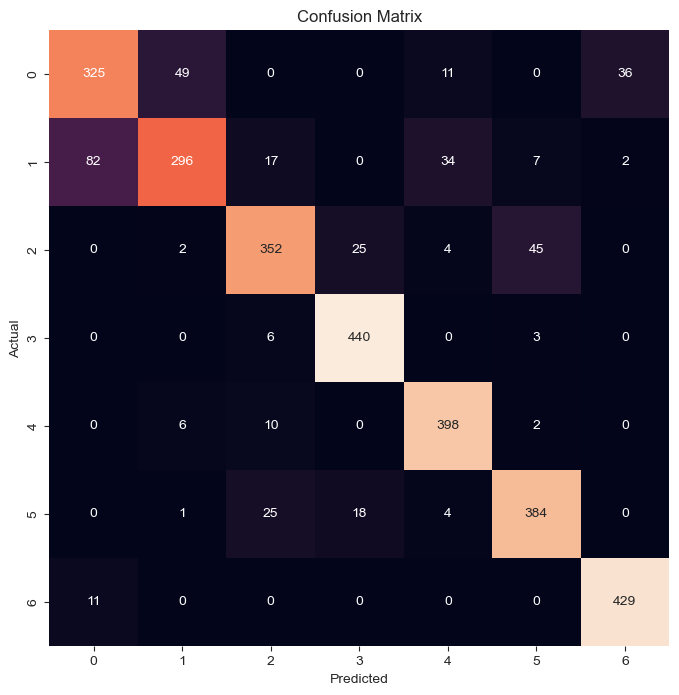

Classification Report               precision    recall  f1-score   support

           0       0.78      0.77      0.77       421
           1       0.84      0.68      0.75       438
           2       0.86      0.82      0.84       428
           3       0.91      0.98      0.94       449
           4       0.88      0.96      0.92       416
           5       0.87      0.89      0.88       432
           6       0.92      0.97      0.95       440

    accuracy                           0.87      3024
   macro avg       0.87      0.87      0.86      3024
weighted avg       0.87      0.87      0.86      3024



0.8677248677248677

In [39]:
evaluate_model(model_1,"Imbalanced",X_test, y_test)

Accuracy(Imbalanced):67.59%


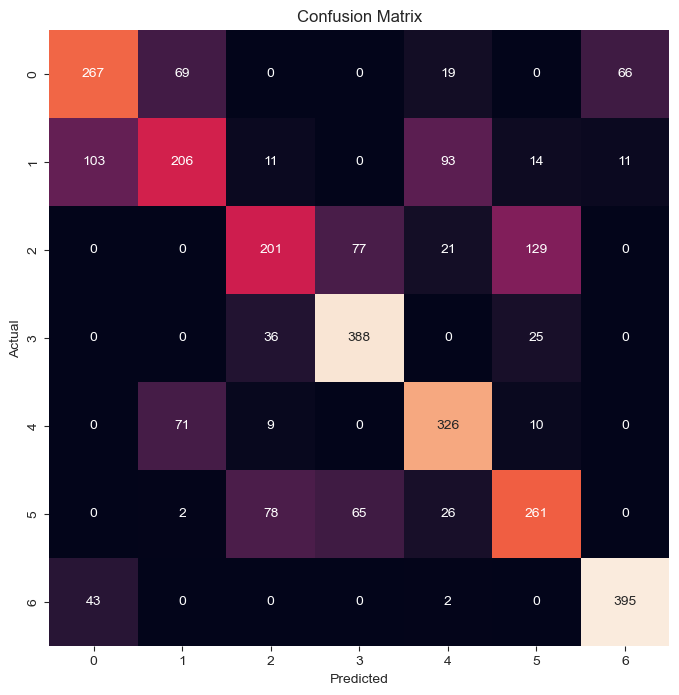

Classification Report               precision    recall  f1-score   support

           0       0.65      0.63      0.64       421
           1       0.59      0.47      0.52       438
           2       0.60      0.47      0.53       428
           3       0.73      0.86      0.79       449
           4       0.67      0.78      0.72       416
           5       0.59      0.60      0.60       432
           6       0.84      0.90      0.87       440

    accuracy                           0.68      3024
   macro avg       0.67      0.67      0.67      3024
weighted avg       0.67      0.68      0.67      3024



0.6759259259259259

In [40]:
model_2 = LogisticRegression()
model_2.fit(X_train, y_train)
evaluate_model(model_2,"Imbalanced",X_test, y_test)

In [41]:
y_pred_probabilities = model_2.predict_proba(X_test)

In [42]:
y_pred_probabilities

array([[1.00699952e-05, 3.73180888e-03, 2.02622902e-01, ...,
        6.31226770e-04, 9.64613724e-02, 3.19298250e-10],
       [1.41886747e-03, 3.63240597e-02, 2.70921495e-01, ...,
        2.28168792e-01, 4.59854759e-01, 3.49407108e-07],
       [3.18354191e-02, 2.05704898e-04, 2.74971044e-18, ...,
        3.84217639e-06, 1.32126632e-17, 9.67955034e-01],
       ...,
       [3.14819760e-02, 1.89825719e-01, 2.35072635e-07, ...,
        7.78677937e-01, 1.63768022e-07, 1.39687344e-05],
       [3.67737014e-08, 8.41419960e-05, 4.73453486e-01, ...,
        3.59031153e-05, 4.53013642e-02, 7.24715916e-14],
       [2.86345865e-11, 1.67000923e-07, 9.14654568e-03, ...,
        1.92504420e-07, 5.27255018e-03, 3.52488163e-18]])

#### Inference
- From above confusion matrix we can observe that most of the true positives and true negatives are from class 1 and Class 2 only.
- We have huge disconnection between over represented classes and under represented classes.

### 1. Random under-sampling
####  It consists of removing samples from the majority class (under-sampling)

In [43]:
under_sampled_data = all_features_df.copy()
under_sampled_data['Cover_Type'].value_counts()

Cover_Type
4    2160
1    2160
0    2160
6    2160
2    2160
5    2160
3    2160
Name: count, dtype: int64

In [44]:
minimum_class_size = np.min(under_sampled_data['Cover_Type'].value_counts().values)
print("Size of smallest class:",minimum_class_size)

Size of smallest class: 2160


In [70]:
under_sampled_data = under_sampled_data.loc[:, ~under_sampled_data.columns.duplicated()]
class_subsets = [under_sampled_data.query("Cover_Type == " + str(i)) for i in range(7)]
class_subsets[0]

,Unnamed: 0,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Soil_Type,Cover_Type
3,186,187,3064,29,24,150,46,5051,204,182,104,2148,1,0,0,29,0
11,14592,14593,3124,119,20,430,69,450,250,218,87,1332,0,0,1,3,0
16,1418,1419,3221,219,3,256,25,6006,216,243,164,1622,1,0,0,22,0
25,8212,8213,3205,138,14,466,89,2423,241,234,120,2773,0,0,1,3,0
29,228,229,3024,344,8,600,105,5201,203,227,163,5764,1,0,0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15095,13961,13962,3235,22,3,175,11,150,218,233,153,1237,0,0,1,3,0
15097,9826,9827,3292,285,29,999,194,3695,129,225,230,2356,0,0,1,3,0
15103,10152,10153,3116,291,16,513,-22,2069,174,236,202,577,0,0,1,3,0
15115,6636,6637,2843,118,5,691,17,660,228,236,142,1321,0,0,1,3,0


#### Undersample the majority class 
- We will go through the each class subsets and sample 2747 records.

In [48]:
class_subsets = [under_sampled_data.query("Cover_Type=="+str(i)) for i in range(7)]
for i in range(7):
    class_subsets[i] = class_subsets[i].sample(minimum_class_size)
under_sampled_data = pd.concat(class_subsets, axis=0).sample(frac=1.0).reset_index(drop=True)

In [49]:
under_sampled_data['Cover_Type'].value_counts()

Cover_Type
1    2160
6    2160
5    2160
0    2160
2    2160
3    2160
4    2160
Name: count, dtype: int64

In [50]:
X_train, X_test, y_train, y_test = split_and_scale_data(under_sampled_data)

model_1 = RandomForestClassifier()
model_1.fit(X_train, y_train)

RandomForestClassifier()

Accuracy(UnderSampling):87.17%


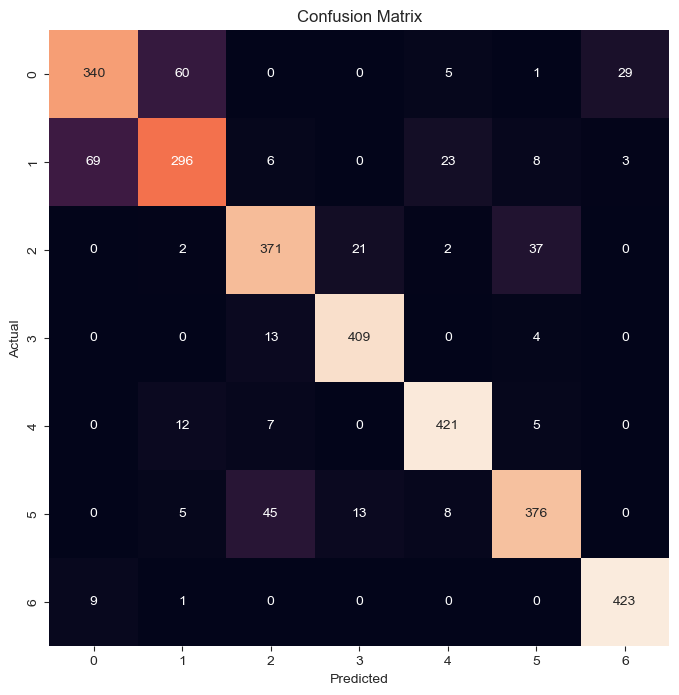

Classification Report               precision    recall  f1-score   support

           0       0.81      0.78      0.80       435
           1       0.79      0.73      0.76       405
           2       0.84      0.86      0.85       433
           3       0.92      0.96      0.94       426
           4       0.92      0.95      0.93       445
           5       0.87      0.84      0.86       447
           6       0.93      0.98      0.95       433

    accuracy                           0.87      3024
   macro avg       0.87      0.87      0.87      3024
weighted avg       0.87      0.87      0.87      3024



0.8716931216931217

In [51]:
evaluate_model(model_1,"UnderSampling",X_test, y_test)

### 2. Random over-sampling
####   It consists of adding more examples from the minority class (over-sampling).

In [52]:
over_sampled_data = all_features_df.copy()
maximum_class_size = np.max(over_sampled_data['Cover_Type'].value_counts().values)
print("Size of largest class:",maximum_class_size)

Size of largest class: 2160


#### Oversampling the minority class 
- We will go through the each class subsets and sample 2747 records.

In [69]:
over_sampled_data = over_sampled_data.loc[:, ~over_sampled_data.columns.duplicated()]
class_subsets = [over_sampled_data.query("Cover_Type=="+str(i)) for i in range(7)]
for i in range(7):
    class_subsets[i] = class_subsets[i].sample(maximum_class_size, replace=True,random_state=42)
over_sampled_data = pd.concat(class_subsets, axis=0).sample(frac=1.0, random_state=42).reset_index(drop=True)

In [59]:
over_sampled_data['Cover_Type'].value_counts()

Cover_Type
2    2160
3    2160
0    2160
5    2160
1    2160
4    2160
6    2160
Name: count, dtype: int64

In [60]:
X_train, X_test, y_train, y_test = split_and_scale_data(over_sampled_data)

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

Accuracy(OverSampling):96.46%


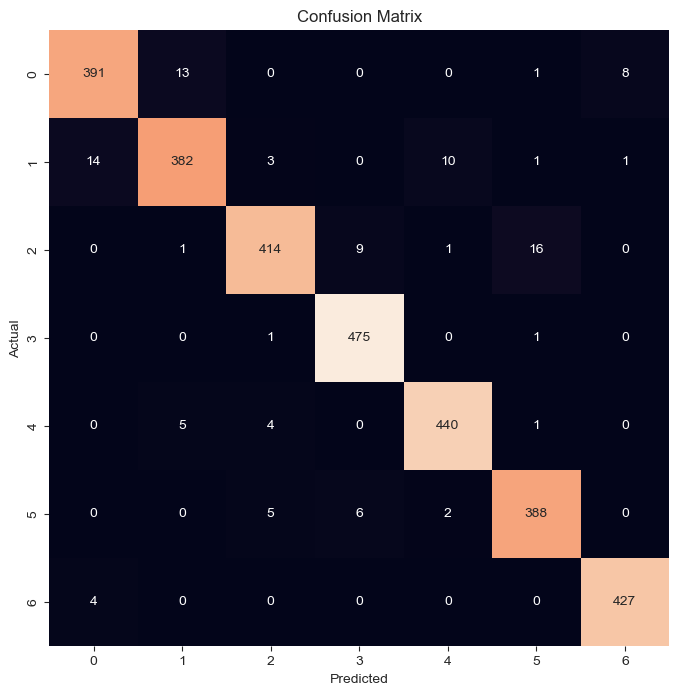

Classification Report               precision    recall  f1-score   support

           0       0.96      0.95      0.95       413
           1       0.95      0.93      0.94       411
           2       0.97      0.94      0.95       441
           3       0.97      1.00      0.98       477
           4       0.97      0.98      0.97       450
           5       0.95      0.97      0.96       401
           6       0.98      0.99      0.99       431

    accuracy                           0.96      3024
   macro avg       0.96      0.96      0.96      3024
weighted avg       0.96      0.96      0.96      3024



0.9646164021164021

In [61]:
evaluate_model(rf_classifier,"OverSampling",X_test, y_test)

#### Random Forest Classifier

In [62]:
imbalanced_data = all_features_df.copy()
X_train, X_test, y_train, y_test = split_and_scale_data(imbalanced_data)

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

#### In order to calculate roc_auc_score in multi class classification we need to mention strategies either as OvR and OvO strategies.

roc_score 0.9861638920484277
Accuracy(Imbalanced_data):86.90%


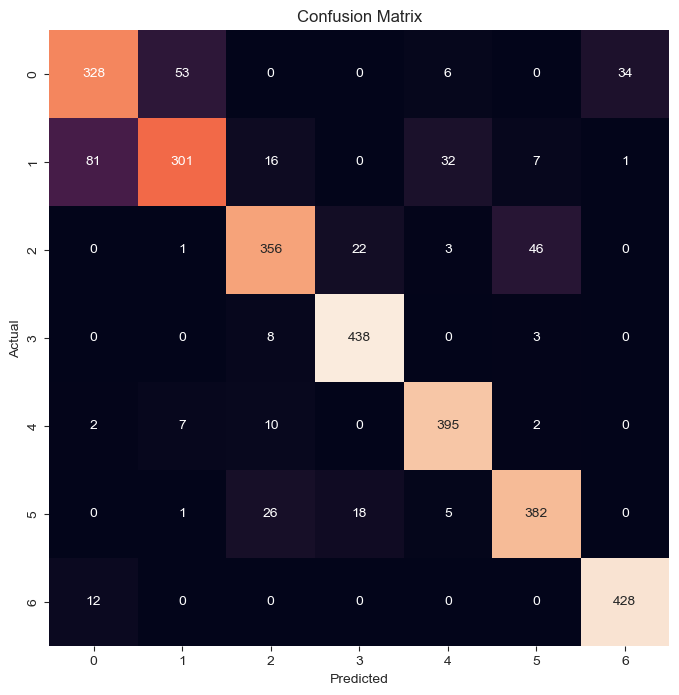

Classification Report               precision    recall  f1-score   support

           0       0.78      0.78      0.78       421
           1       0.83      0.69      0.75       438
           2       0.86      0.83      0.84       428
           3       0.92      0.98      0.94       449
           4       0.90      0.95      0.92       416
           5       0.87      0.88      0.88       432
           6       0.92      0.97      0.95       440

    accuracy                           0.87      3024
   macro avg       0.87      0.87      0.87      3024
weighted avg       0.87      0.87      0.87      3024



In [63]:
# Make predictions
y_pred_probabilities = rf_classifier.predict_proba(X_test)
rf_roc_auc = roc_auc_score(y_test, y_pred_probabilities,multi_class="ovr") #Calculate Roc
print("roc_score",rf_roc_auc)
rf_accuracy =  evaluate_model(rf_classifier,"Imbalanced_data",X_test, y_test)

#### Extra Trees (Random Forests) Classifier

roc_score 0.9868228739299132
Accuracy(Imbalanced):87.43%


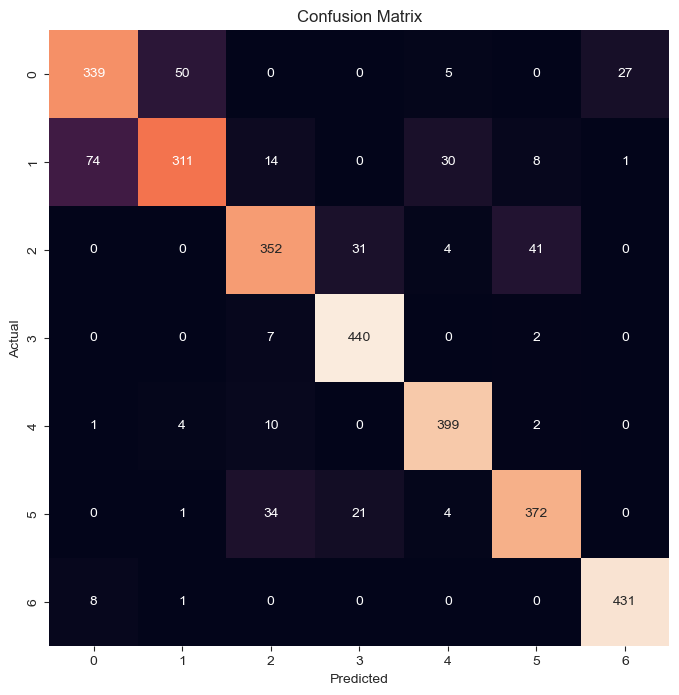

Classification Report               precision    recall  f1-score   support

           0       0.80      0.81      0.80       421
           1       0.85      0.71      0.77       438
           2       0.84      0.82      0.83       428
           3       0.89      0.98      0.94       449
           4       0.90      0.96      0.93       416
           5       0.88      0.86      0.87       432
           6       0.94      0.98      0.96       440

    accuracy                           0.87      3024
   macro avg       0.87      0.87      0.87      3024
weighted avg       0.87      0.87      0.87      3024



In [64]:
xrf_classifier = ExtraTreesClassifier()
xrf_classifier.fit(X_train, y_train)
# Make predictions
y_pred_probabilities = xrf_classifier.predict_proba(X_test)
xrf_roc_auc = roc_auc_score(y_test, y_pred_probabilities,multi_class="ovr") #Calculate Roc
print("roc_score",xrf_roc_auc)
xrf_accuracy = evaluate_model(xrf_classifier,"Imbalanced",X_test, y_test)

#### Light Gradient Boosting Machine (LightGBM) Classifier

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2580
[LightGBM] [Info] Number of data points in the train set: 12096, number of used features: 16
[LightGBM] [Info] Start training from score -1.939565
[LightGBM] [Info] Start training from score -1.949388
[LightGBM] [Info] Start training from score -1.943598
[LightGBM] [Info] Start training from score -1.955797
[LightGBM] [Info] Start training from score -1.936693
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.950551
roc_score 0.9854965633811995
Accuracy(Imbalanced):87.24%


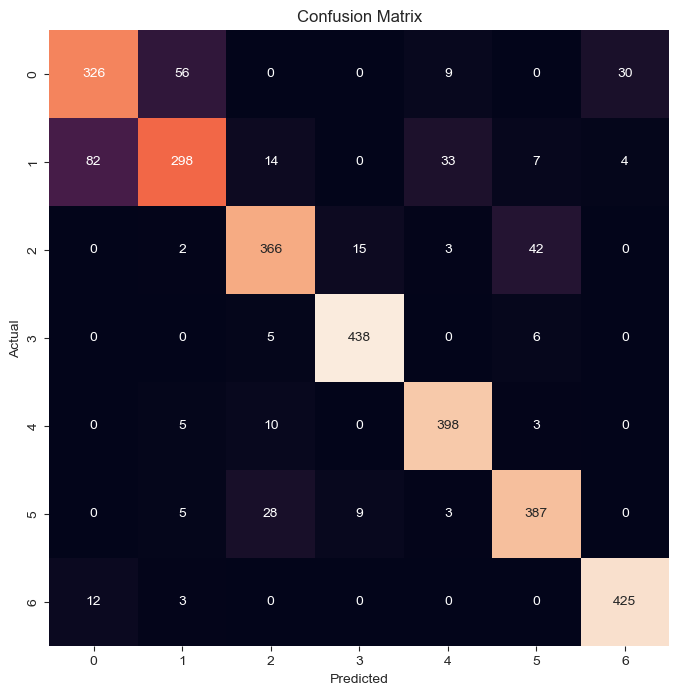

Classification Report               precision    recall  f1-score   support

           0       0.78      0.77      0.78       421
           1       0.81      0.68      0.74       438
           2       0.87      0.86      0.86       428
           3       0.95      0.98      0.96       449
           4       0.89      0.96      0.92       416
           5       0.87      0.90      0.88       432
           6       0.93      0.97      0.95       440

    accuracy                           0.87      3024
   macro avg       0.87      0.87      0.87      3024
weighted avg       0.87      0.87      0.87      3024



In [68]:
# Clean column names to remove special characters
X_train.columns = X_train.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
X_test.columns = X_test.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)
# Drop duplicate columns
X_train = X_train.loc[:, ~X_train.columns.duplicated()]
X_test = X_test.loc[:, ~X_test.columns.duplicated()]
# create model apply fit_evaluate_model
lgbm_classifier = LGBMClassifier()
lgbm_classifier.fit(X_train, y_train)
# Make predictions
y_pred_probabilities = lgbm_classifier.predict_proba(X_test)
lgbm_roc_auc = roc_auc_score(y_test, y_pred_probabilities,multi_class="ovr") #Calculate Roc
print("roc_score",lgbm_roc_auc)
lgbm_accuracy = evaluate_model(lgbm_classifier,"Imbalanced",X_test, y_test)

roc_score 0.9842583908786793
Accuracy(Imbalanced):86.41%


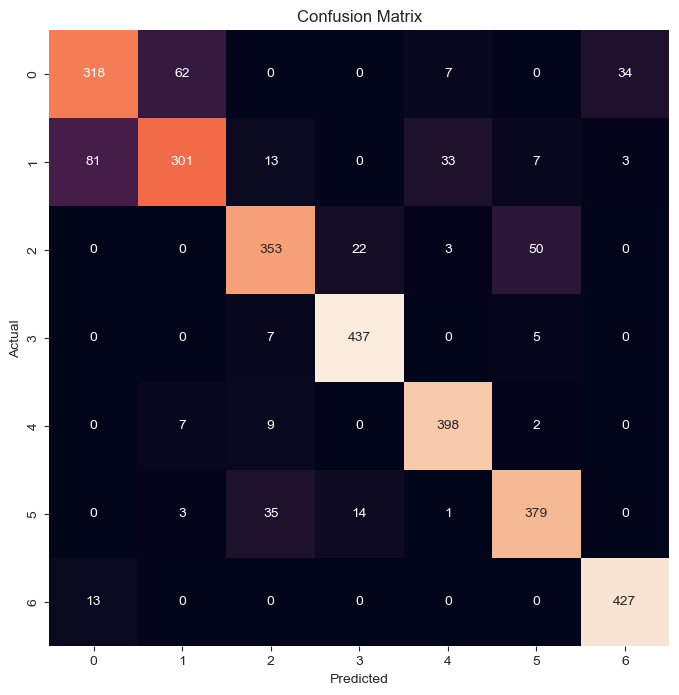

Classification Report               precision    recall  f1-score   support

           0       0.77      0.76      0.76       421
           1       0.81      0.69      0.74       438
           2       0.85      0.82      0.84       428
           3       0.92      0.97      0.95       449
           4       0.90      0.96      0.93       416
           5       0.86      0.88      0.87       432
           6       0.92      0.97      0.94       440

    accuracy                           0.86      3024
   macro avg       0.86      0.86      0.86      3024
weighted avg       0.86      0.86      0.86      3024



In [71]:
# create model apply fit_evaluate_model 
cat_classifier = CatBoostClassifier(verbose=False)
cat_classifier.fit(X_train, y_train)
# Make predictions
y_pred_probabilities = cat_classifier.predict_proba(X_test)
cat_roc_auc = roc_auc_score(y_test, y_pred_probabilities,multi_class="ovr") #Calculate Roc
print("roc_score",cat_roc_auc)
cat_accuracy = evaluate_model(cat_classifier,"Imbalanced",X_test, y_test)

roc_score 0.9842583908786793
Accuracy(Imbalanced):86.61%


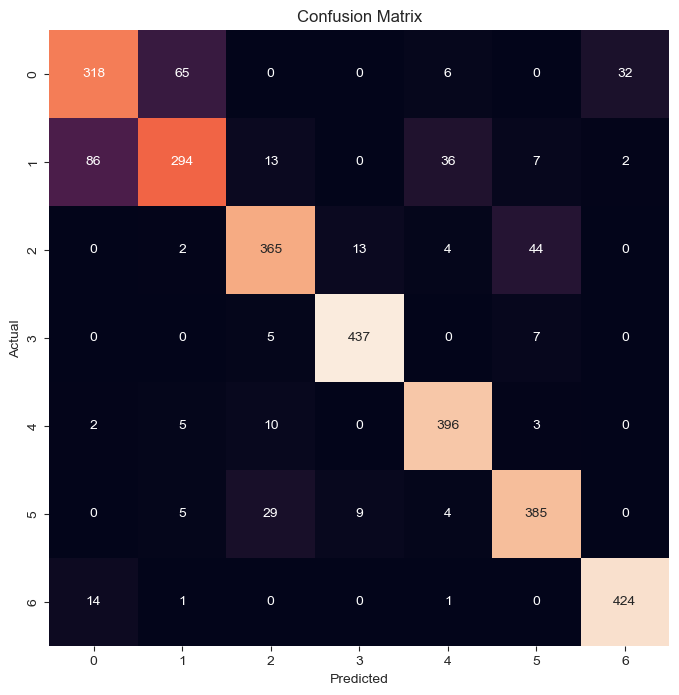

Classification Report               precision    recall  f1-score   support

           0       0.76      0.76      0.76       421
           1       0.79      0.67      0.73       438
           2       0.86      0.85      0.86       428
           3       0.95      0.97      0.96       449
           4       0.89      0.95      0.92       416
           5       0.86      0.89      0.88       432
           6       0.93      0.96      0.94       440

    accuracy                           0.87      3024
   macro avg       0.86      0.87      0.86      3024
weighted avg       0.86      0.87      0.86      3024



In [72]:
# create model apply fit_evaluate_model 
xgb_classifier = XGBClassifier(verbose=False)
xgb_classifier.fit(X_train, y_train)
# Make predictions
y_pred_probabilities = xgb_classifier.predict_proba(X_test)
xgb_roc_auc = roc_auc_score(y_test, y_pred_probabilities,multi_class="ovr") #Calculate Roc
print("roc_score",cat_roc_auc)
xgb_accuracy = evaluate_model(xgb_classifier,"Imbalanced",X_test, y_test)

## Evaluate all base Models

In [73]:
# create dataframe of accuracy and model and sort values
performance_comparison = pd.DataFrame({"Model": [ "LightGBM", "Random Forests", "Extra Trees","cat_accuracy","xgb_accuracy"],
                                       "Accuracy": [ lgbm_accuracy, rf_accuracy, xrf_accuracy,cat_accuracy,xgb_accuracy]})

performance_comparison = performance_comparison.sort_values(by="Accuracy", ascending=True)

# set the plot
plt.figure(figsize=(10,10))
ax = sns.barplot(x="Accuracy", y="Model", data=performance_comparison, palette="Greens_d")

# set title arrange labels
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Accuracy Score of Different Models", size=14)


Text(0.5, 1.0, 'Accuracy Score of Different Models')

## Plot Roc Auc Curve

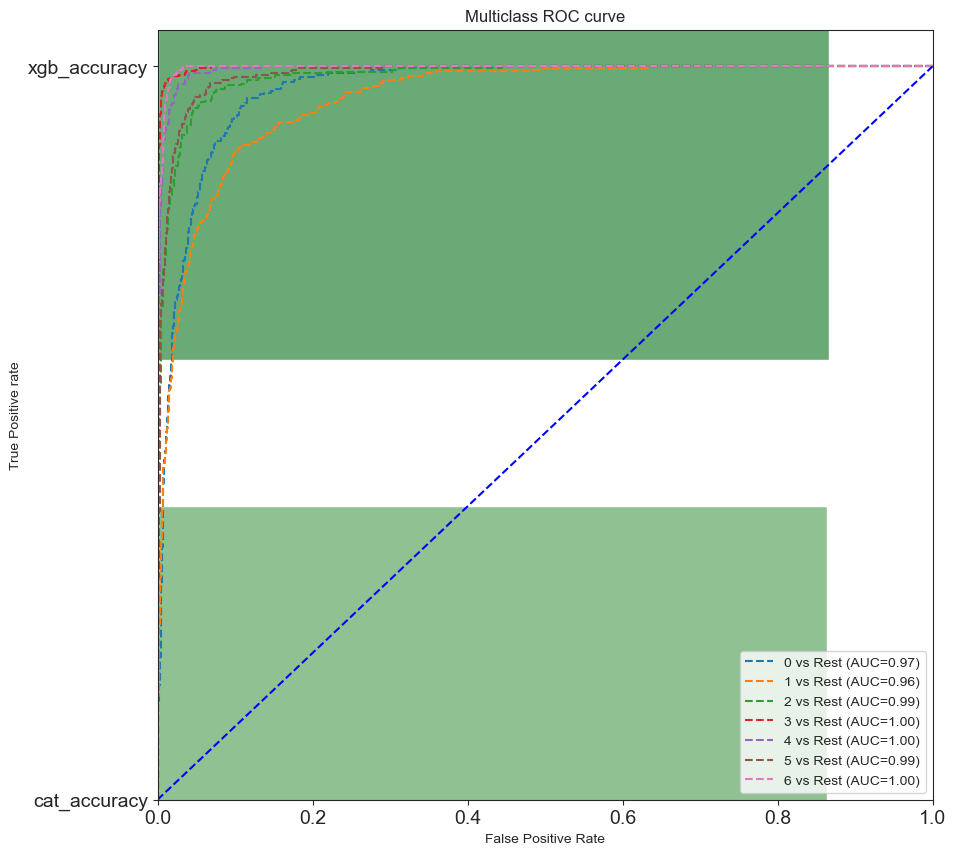

In [74]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc
#binarize the y_values

classes=np.unique(y_test)
y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 7

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], y_pred_probabilities[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

### Best Model is Random Forest Classifier with 96 % Accuracy, hence we can save this model

In [75]:
import pickle
 
# Save the trained model as a pickle file.
pickle.dump(rf_classifier, open('rf_classifier.pkl', 'wb'))